# **Módulo: Aprendizaje no supervisado**
**Reto | Segmentación de datos empleados**
---

In [23]:
from sklearn import cluster, metrics
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler, Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
#2.Carga los datos del archivo
df= pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Data16/Train.csv')
#df3 =  df[['Employee_ID', 'Gender','Relationship_Status']]
#df3

In [85]:
#Reemplazar datos faltantes
df2 = df.copy(deep=True)
df2['Age'] = df2['Age'].fillna(df2['Age'].mode()[0])
df2['Time_of_service'] = df2['Time_of_service'].fillna(df2['Time_of_service'].mode()[0])
df2['Pay_Scale'] = df2['Pay_Scale'].fillna(df2['Pay_Scale'].mode()[0])

df2['Work_Life_balance'] = df2['Work_Life_balance'].fillna(df2['Work_Life_balance'].mode()[0])
df2['VAR2'] = df2['VAR2'].fillna(df2['VAR2'].mode()[0])
df2['VAR4'] = df2['VAR4'].fillna(df2['VAR4'].mode()[0])

#Eliminamos los que no haya localizado
df2.dropna()



,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [86]:
df_processed = df2.copy(deep=True)

# Drop 'Employee_ID' as it's typically an identifier and not used in clustering
df_processed.drop('Employee_ID', axis=1, inplace=True)

# Handle 'Gender' using OneHotEncoder as was being done previously
enc_gender = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_gender_encoded = enc_gender.fit_transform(df_processed[['Gender']])
gender_categories = enc_gender.categories_[0]
for i, val in enumerate(gender_categories):
  df_processed['Gender_' + str(val)] = X_gender_encoded[:, i]
df_processed.drop('Gender', axis=1, inplace=True) # Drop the original 'Gender' column

# Handle 'Relationship_Status' using OneHotEncoder as was being done previously
enc_Rel = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_rel_encoded = enc_Rel.fit_transform(df_processed[['Relationship_Status']])
rel_categories = enc_Rel.categories_[0]
for i, val in enumerate(rel_categories):
  df_processed['Relationship_Status_' + str(val)] = X_rel_encoded[:, i]
df_processed.drop('Relationship_Status', axis=1, inplace=True) # Drop the original 'Gender' column

# Handle all other remaining object type columns using OrdinalEncoder
for col in df_processed.columns:
    if df_processed[col].dtype == 'object':
        df_processed[col] = OrdinalEncoder().fit_transform(df_processed[[col]])




# Now, all columns should be numeric
X_train = df_processed.to_numpy()
X_train


array([[42.,  4.,  1., ...,  0.,  1.,  0.],
       [24.,  3.,  3., ...,  1.,  0.,  1.],
       [58.,  3.,  0., ...,  0.,  1.,  0.],
       ...,
       [49.,  3.,  3., ...,  0.,  0.,  1.],
       [47.,  3.,  4., ...,  0.,  1.,  0.],
       [58.,  3.,  1., ...,  0.,  1.,  0.]])

In [93]:
# Normalizar
X1 = Normalizer().fit_transform(X_train)

df = pd.DataFrame(X1)
df.to_excel('df1.xlsx')

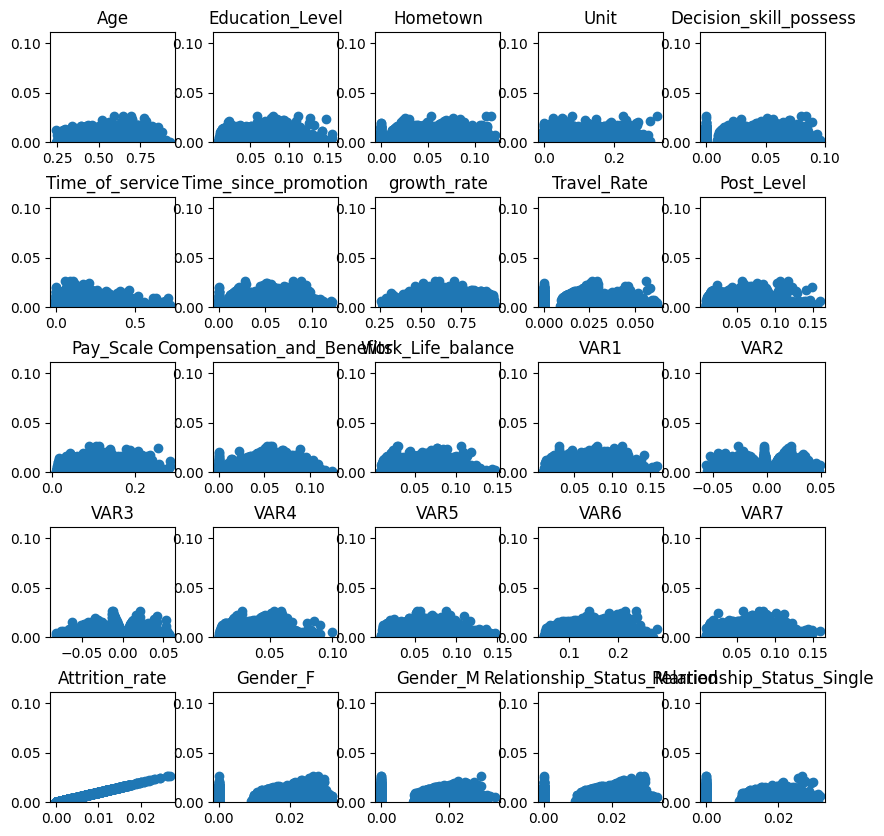

In [106]:

#X1 = Normalizer().fit_transform(X_train)

v = 0
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    axs[i,j].scatter(X1[:,v], X1[:,20])
    axs[i,j].set_title(df_processed.columns[v])
    axs[i,j].set_ylim([0 ,0.111])
    v+=1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [88]:
X2 = StandardScaler().fit_transform(X_train)



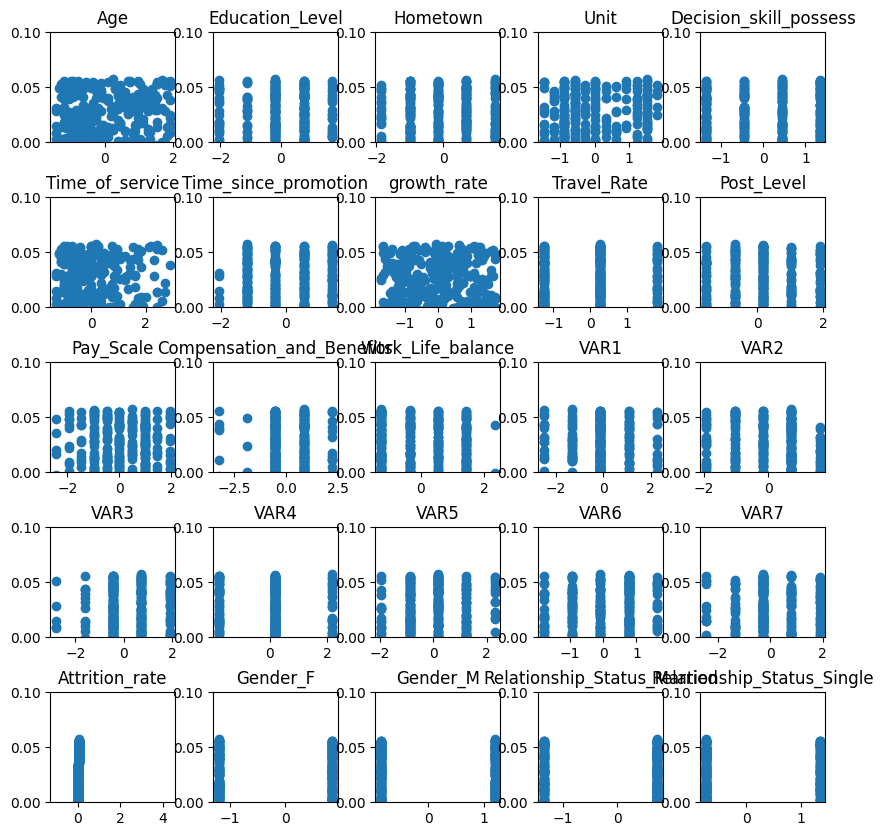

In [108]:
X2 = StandardScaler().fit_transform(X_train)
v = 0
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    axs[i,j].scatter(X2[:,v], X2[:,20])
    axs[i,j].set_title(df_processed.columns[v])
    axs[i,j].set_ylim([0,0.1])
    v+=1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [ ]:
#4.Selecciona el número de grupos adecuados para agrupar usando K-means
#a) Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.
#b) Utiliza una estrategia para determinar el número adecuado de grupos como K-Elbow o Silhouette-Plot.

In [ ]:
#5.Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo:
#a) Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo.

In [ ]:
#6.Interpreta los resultados obtenidos:
#a) Genera diferentes visualizaciones que ayuden a mostrar las características que tienen en común los empleados dentro de cada grupo.
#b)Redacta una historia con las conclusiones más importantes del análisis de manera que ayude a la toma de decisiones.